# `Bangalore Housing Price Prediction`

## ` Problem Statment `

#### Business Understanding and what they are expecting from this model

- What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

- Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

#### `Goal`

####  `Predict the price of the House in Banglore based on various factors and variables`

## ` Data Sources `

In [121]:
## Csv file format
path = "/content/Bengaluru_House_Data.csv"

In [122]:
## Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## ` Data Ingestion`

In [123]:
df = pd.read_csv(path)

In [124]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## `Data Understanding and Exploration`

In [125]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [126]:
df.shape

(13320, 9)

In [127]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [129]:
## Bath column is showing a max value of 40 (40 bathrooms)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [131]:
df.describe(include="object").T

,count,unique,top,freq
area_type,13320,4,Super built-up Area,8790
availability,13320,81,Ready To Move,10581
location,13319,1305,Whitefield,540
size,13304,31,2 BHK,5199
society,7818,2688,GrrvaGr,80
total_sqft,13320,2117,1200,843


In [132]:
for i in df.columns:
  print(df[i].value_counts())
  print("-"*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
--------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
--------------------
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
--------------------
2 BHK         5199
3 BHK        

## ` Data Cleaning`

In [133]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [134]:
df.isna().sum() * 100 / df.shape[0]

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [135]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [136]:
# Filling Balacony with median value
value = df['balcony'].median()
value

2.0

In [137]:
df['balcony'].fillna(value=value,inplace=True)

In [138]:
df['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [139]:
## Filling bath with median since there is outlier present in the data
value = df['bath'].median()
value

2.0

In [140]:
df['bath'].fillna(value=value,inplace=True)

In [141]:
df.drop(columns=['society'],inplace=True)

In [142]:
df.isna().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [143]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [144]:
df.dropna(axis=0,inplace=True)

In [145]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [146]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4309
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [147]:
## It is showing as Bedroom and BHK
## we try to cut the integer

In [148]:
df['bhk'] = df['size'].str.split().str.get(0).astype(int)
df['bhk']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhk, Length: 13303, dtype: int64

In [149]:
df.drop(columns=['size'],inplace=True)

In [150]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2


In [151]:
df['availability'].value_counts()

Ready To Move    10580
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 80, dtype: int64

In [152]:
def convertrange(x):

  temp =x.split('-')
  if len(temp) == 2:
    return (float(temp[0])  + float(temp[1]))/2
  try:
    return float(x)
  except:
    return None

In [153]:
df['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13303, dtype: object

In [154]:
df['total_sqft'] = df['total_sqft'].apply(convertrange)

In [155]:
## Price per sqr feet

In [156]:
df['price_per_sq_feet'] = df['price'] * 100000 / df['total_sqft']
df['price_per_sq_feet']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sq_feet, Length: 13303, dtype: float64

In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13257.0,1558.809175,1238.478935,1.000000,1100.000000,1275.000000,1680.000000,52272.0
bath,13303.0,2.689619,1.339393,1.000000,2.000000,2.000000,3.000000,40.0
balcony,13303.0,1.602872,0.803455,0.000000,1.000000,2.000000,2.000000,3.0
price,13303.0,112.584033,148.993820,8.000000,50.000000,72.000000,120.000000,3600.0
bhk,13303.0,2.803728,1.295022,1.000000,2.000000,3.000000,3.000000,43.0
price_per_sq_feet,13257.0,7912.825441,106497.600338,267.829813,4271.186441,5438.596491,7313.317937,12000000.0


In [158]:
df['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13303, dtype: object

In [159]:
df['location'] = df['location'].apply(lambda x:x.strip())
location_counts = df['location'].value_counts()

In [160]:
location_counts_less_10 = location_counts[location_counts <= 10] ## The area which is cming less than 10 times we will consider  as others
location_counts_less_10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [161]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_counts_less_10 else x)
df['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13303, dtype: object

In [162]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sq_feet
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [163]:
def availability(x):
    if x == "Ready To Move":
      return "Ready To Move"
    else:
      return "It take few days to move"

In [164]:
df['availability'] = df['availability'].apply(availability)
df['availability']

0        It take few days to move
1                   Ready To Move
2                   Ready To Move
3                   Ready To Move
4                   Ready To Move
                   ...           
13315               Ready To Move
13316               Ready To Move
13317               Ready To Move
13318    It take few days to move
13319               Ready To Move
Name: availability, Length: 13303, dtype: object

### ` Data Manipulation `

In [165]:
df.groupby("area_type")['price_per_sq_feet'].max()

area_type
Built-up  Area           2300000.0
Carpet  Area              200000.0
Plot  Area              12000000.0
Super built-up  Area       56000.0
Name: price_per_sq_feet, dtype: float64

In [166]:
df.groupby("area_type")['price_per_sq_feet'].mean()

area_type
Built-up  Area           7361.214416
Carpet  Area             9266.333479
Plot  Area              18316.438605
Super built-up  Area     5690.790146
Name: price_per_sq_feet, dtype: float64

In [167]:
df.groupby("location")['price_per_sq_feet'].max()

location
1st Block Jayanagar          1.875000e+04
1st Phase JP Nagar           2.500000e+04
2nd Phase Judicial Layout    5.000000e+03
2nd Stage Nagarbhavi         2.416667e+04
5th Block Hbr Layout         2.596154e+04
                                 ...     
Yelahanka                    1.987578e+04
Yelahanka New Town           2.247500e+04
Yelenahalli                  5.176877e+03
Yeshwanthpur                 1.906158e+04
other                        2.300000e+06
Name: price_per_sq_feet, Length: 242, dtype: float64

In [168]:
df.groupby("location")['price_per_sq_feet'].mean().head()

location
1st Block Jayanagar          11496.236323
1st Phase JP Nagar           10154.472338
2nd Phase Judicial Layout     4048.701183
2nd Stage Nagarbhavi         17349.228395
5th Block Hbr Layout         12137.476027
Name: price_per_sq_feet, dtype: float64

In [169]:
df.groupby("availability")['price_per_sq_feet'].mean()

availability
It take few days to move    6297.910815
Ready To Move               8328.925254
Name: price_per_sq_feet, dtype: float64

## ` EDA`

In [170]:
# Univariate Analysis

In [171]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable
 #to check spread, central tendency , dispersion and outliers
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="teal",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='purple',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})


<ipython-input-171-bc3eaf990936>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=False,color='purple',ax=ax_dis)
<ipython-input-171-bc3eaf990936>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=False,color='purple',ax=ax_dis)
<ipython-input-171-bc3eaf990936>:15: UserWarning

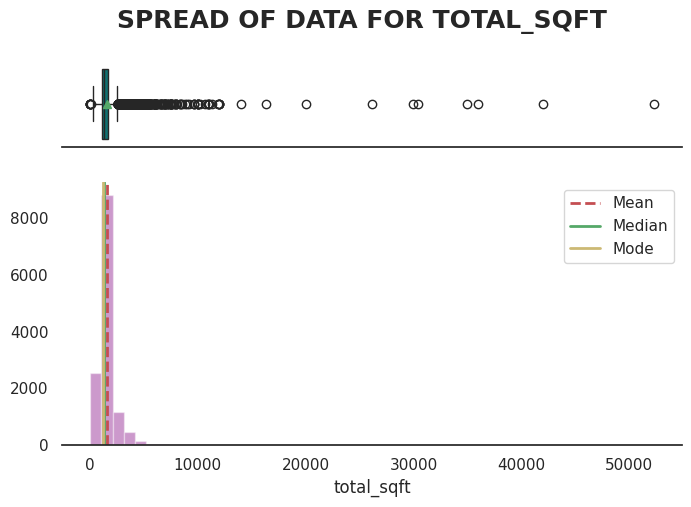

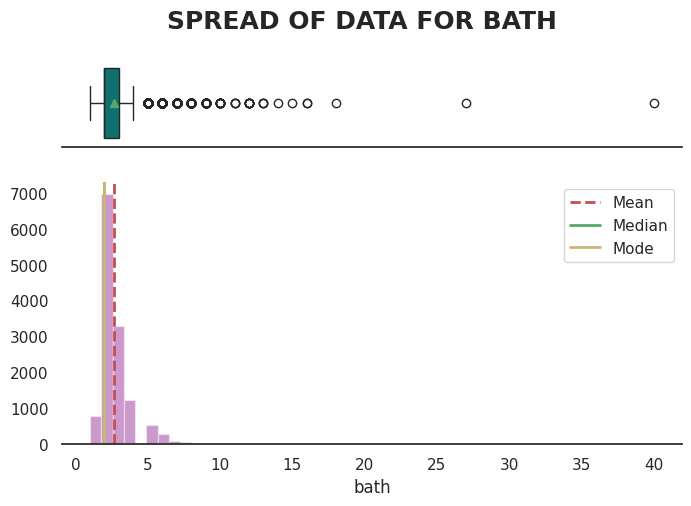

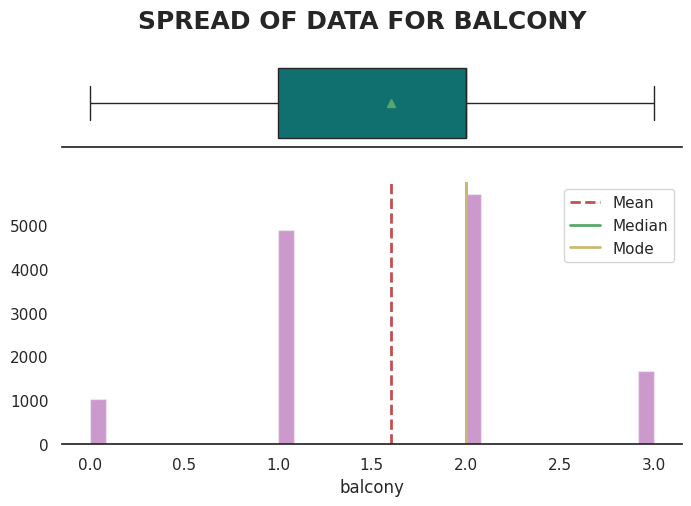

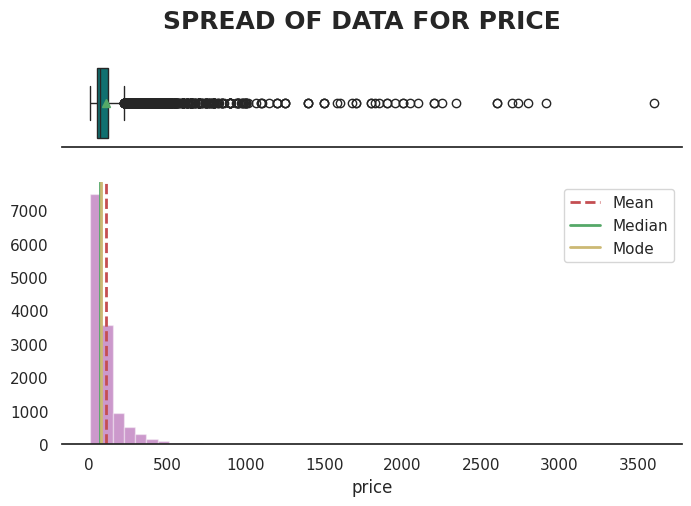

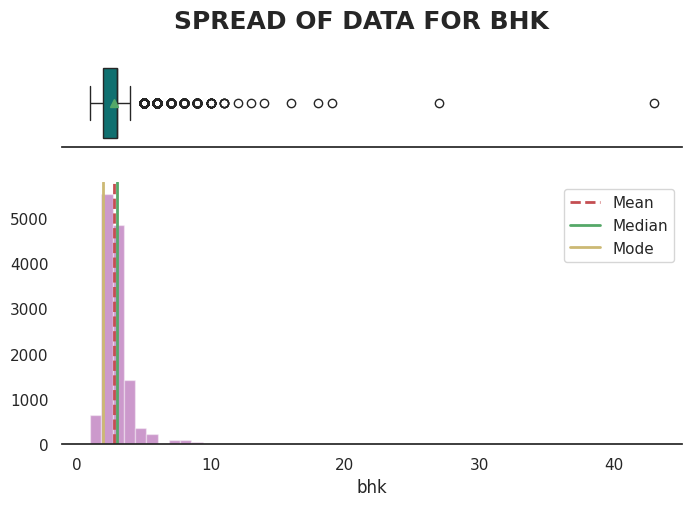

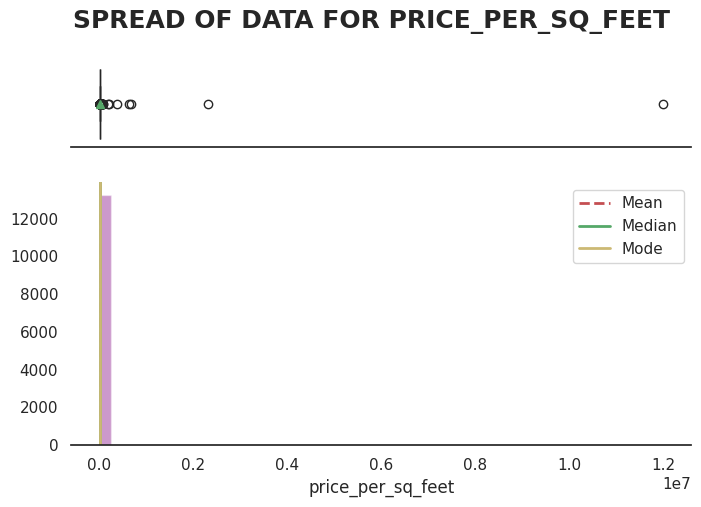

In [172]:
#select all quantitative columns for checking the spread
list_col=  df.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

In [173]:
## we can observe that outliers is present in the data

In [174]:
df.dtypes[df.dtypes=="object"].index

Index(['area_type', 'availability', 'location'], dtype='object')

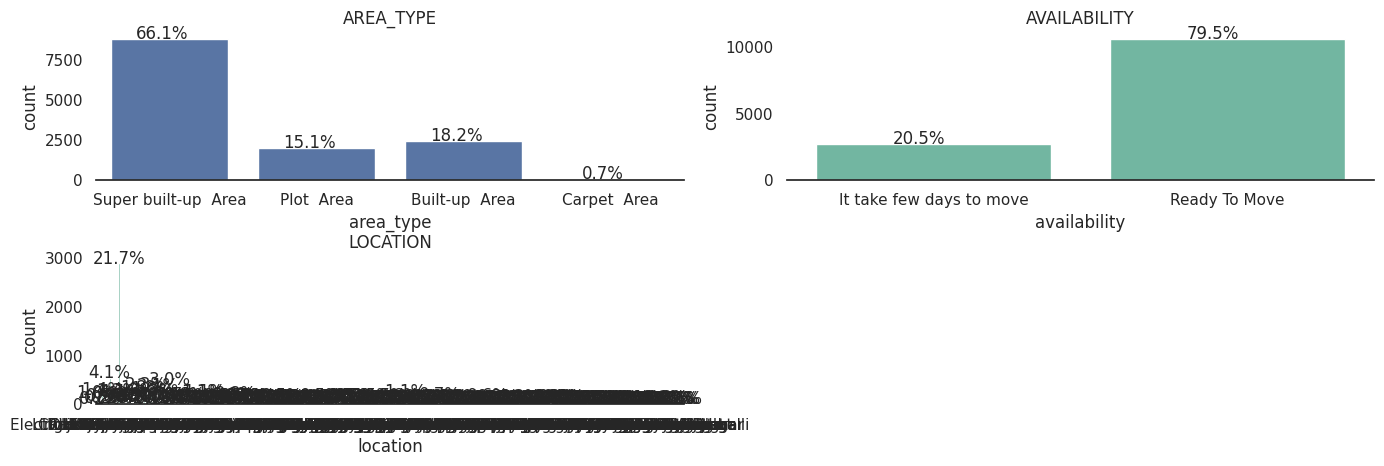

In [175]:
# Making a list of all categorical variables

plt.figure(figsize=(14,20))

sns.set_theme(style="white")
cols=['area_type', 'availability', 'location']
for i, variable in enumerate(cols):
                     plt.subplot(9,2,i+1)
                     order = df[variable].value_counts(ascending=False).index
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=df[variable], data=df )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(cols[i].upper())

<ipython-input-176-54817f801aac>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


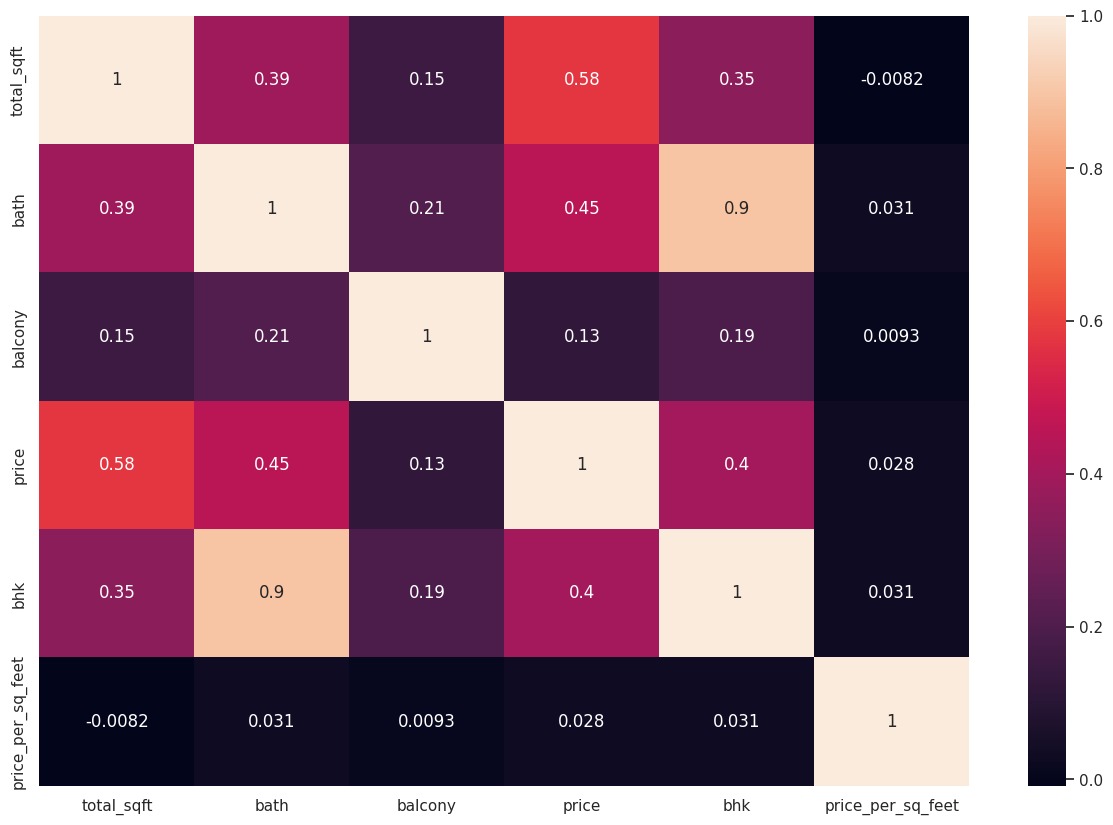

In [176]:
#Bivariate & Multivariate Analysis
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [177]:
"""sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(df,corner=True)
plt.show()"""

'sns.set_palette(sns.color_palette("Set1", 8))\nsns.pairplot(df,corner=True)\nplt.show()'

In [178]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sq_feet
0,Super built-up Area,It take few days to move,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


## `Dropping Outliers`

In [179]:
df.shape

(13303, 9)

In [180]:
# Finding the IQR
percentile25 = df['total_sqft'].quantile(0.25)
percentile75 = df['total_sqft'].quantile(0.75)

In [181]:
iqr = percentile75 - percentile25

In [182]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [183]:
df[df['total_sqft'] > upper_limit]

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sq_feet
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.0,4,4615.384615
6,Super built-up Area,It take few days to move,Old Airport Road,2732.0,4.0,2.0,204.0,4,7467.057101
7,Super built-up Area,Ready To Move,Rajaji Nagar,3300.0,4.0,2.0,600.0,4,18181.818182
11,Plot Area,Ready To Move,Whitefield,2785.0,5.0,3.0,295.0,4,10592.459605
18,Super built-up Area,Ready To Move,other,2770.0,4.0,2.0,290.0,3,10469.314079
...,...,...,...,...,...,...,...,...,...
13290,Super built-up Area,Ready To Move,Sarjapur Road,4050.0,2.0,1.0,450.0,4,11111.111111
13299,Super built-up Area,It take few days to move,Whitefield,2856.0,5.0,0.0,154.5,4,5409.663866
13315,Built-up Area,Ready To Move,Whitefield,3453.0,4.0,0.0,231.0,5,6689.834926
13316,Super built-up Area,Ready To Move,other,3600.0,5.0,2.0,400.0,4,11111.111111


In [184]:
df = df[df['total_sqft'] < upper_limit]

In [185]:
df.shape

(12096, 9)

In [186]:
# Finding the IQR
percentile25 = df['bath'].quantile(0.25)
percentile75 = df['bath'].quantile(0.75)

In [187]:
iqr = percentile75 - percentile25

In [188]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [189]:
df = df[df['bath'] <  upper_limit]

In [190]:
# Finding the IQR
percentile25 = df['bhk'].quantile(0.25)
percentile75 = df['bhk'].quantile(0.75)

In [191]:
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [192]:
df = df[df['bhk'] < upper_limit]

## `Creating dependent and independent variable`

In [224]:
X = df.drop(columns='price',axis=1)

In [225]:
y = df.loc[:,['price']]
y

,price
0,39.07
2,62.00
3,95.00
4,51.00
5,38.00
...,...
13312,47.00
13313,57.00
13314,112.00
13317,60.00


## ` Model Bulding using pipeline`

In [197]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

In [198]:
df.head(1)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sq_feet
0,Super built-up Area,It take few days to move,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606


In [201]:
df['location'].value_counts()

other                   2247
Whitefield               441
Sarjapur  Road           336
Electronic City          301
Kanakpura Road           264
                        ... 
Konanakunte                7
Doddaballapur              6
Mahalakshmi Layout         6
5th Block Hbr Layout       5
Cunningham Road            1
Name: location, Length: 242, dtype: int64

In [218]:
df = df[df['location'] != "Cunningham Road"]

In [219]:
df[df['location'] == "Cunningham Road"]

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sq_feet


In [220]:
## Train test split

In [226]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7966, 8)
(3415, 8)
(7966, 1)
(3415, 1)


In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [227]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['area_type','location']),
    ('col_tnf1',OrdinalEncoder(categories=[['It take few days to move','Ready To Move']]),['availability'])
],remainder='passthrough')

step2=StandardScaler()

step3 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)

# Print regression metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [229]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [231]:
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)

# Print regression metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

0.5617849101545906
Mean Squared Error (MSE): 1481.21
Mean Absolute Error (MAE): 21.66
R-squared (R2): 0.56


In [233]:
from sklearn.tree import DecisionTreeRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['area_type','location']),
    ('col_tnf1',OrdinalEncoder(categories=[['It take few days to move','Ready To Move']]),['availability'])
],remainder='passthrough')

step2=StandardScaler()

step3 = DecisionTreeRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)

# Print regression metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

0.9350033510183146
Mean Squared Error (MSE): 219.69
Mean Absolute Error (MAE): 1.58
R-squared (R2): 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [236]:
from sklearn.ensemble import RandomForestRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['area_type','location']),
    ('col_tnf1',OrdinalEncoder(categories=[['It take few days to move','Ready To Move']]),['availability'])
],remainder='passthrough')

step2=StandardScaler()

step3 = RandomForestRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])

pipe.fit(X_train,y_train)

y_pred_rfr = pipe.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred_rfr)
mae = mean_absolute_error(y_test, y_pred_rfr)
r2 = r2_score(y_test, y_pred_rfr)
print(r2)

# Print regression metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.9639800389456682
Mean Squared Error (MSE): 121.75
Mean Absolute Error (MAE): 0.90
R-squared (R2): 0.96


In [238]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['area_type','location']),
    ('col_tnf1',OrdinalEncoder(categories=[['It take few days to move','Ready To Move']]),['availability'])
],remainder='passthrough')

step2=StandardScaler()

step3 = RandomForestRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])

pipe.fit(X_train,y_train)

y_pred_rfr = pipe.predict(X_test)
y_pred_rf1 = pipe.predict(X_train)

# Calculate regression metrics for training set
mse_train = mean_squared_error(y_train, y_pred_rf1)
mae_train = mean_absolute_error(y_train, y_pred_rf1)
r2_train = r2_score(y_train, y_pred_rf1)

# Calculate regression metrics for testing set
mse_test = mean_squared_error(y_test, y_pred_rfr)
mae_test = mean_absolute_error(y_test, y_pred_rfr)
r2_test = r2_score(y_test, y_pred_rfr)

# Print regression metrics for training set
print(f'Training Set Metrics:')
print(f'Mean Squared Error (MSE): {mse_train:.2f}')
print(f'Mean Absolute Error (MAE): {mae_train:.2f}')
print(f'R-squared (R2): {r2_train:.2f}')

# Print regression metrics for testing set
print('\nTesting Set Metrics:')
print(f'Mean Squared Error (MSE): {mse_test:.2f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print(f'R-squared (R2): {r2_test:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Training Set Metrics:
Mean Squared Error (MSE): 6.21
Mean Absolute Error (MAE): 0.34
R-squared (R2): 1.00

Testing Set Metrics:
Mean Squared Error (MSE): 116.37
Mean Absolute Error (MAE): 0.90
R-squared (R2): 0.97
